## Predicting Seattle Home Prices with Keras Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
df.isnull().sum()  # We have no missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### EDA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


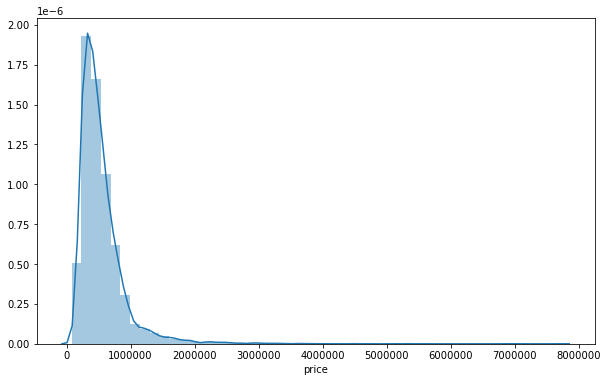

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.ticklabel_format(style='plain', axis='x')

In [6]:
df[df['price'] > 2000000].count()['id']

198

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

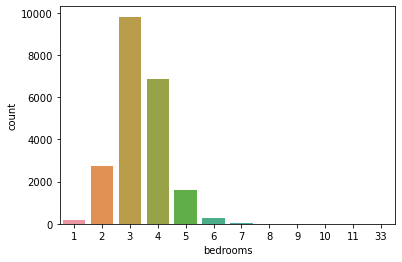

In [7]:
sns.countplot(df['bedrooms'])

In [8]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

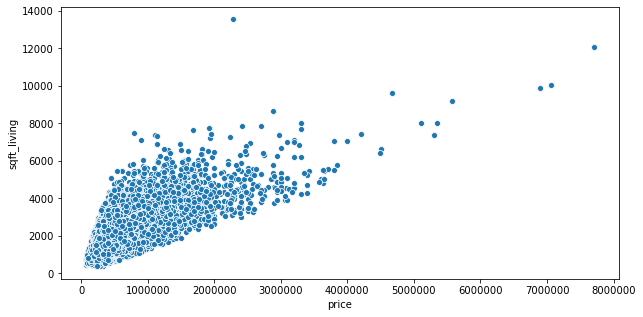

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living',data=df)
plt.ticklabel_format(style='plain', axis='x')

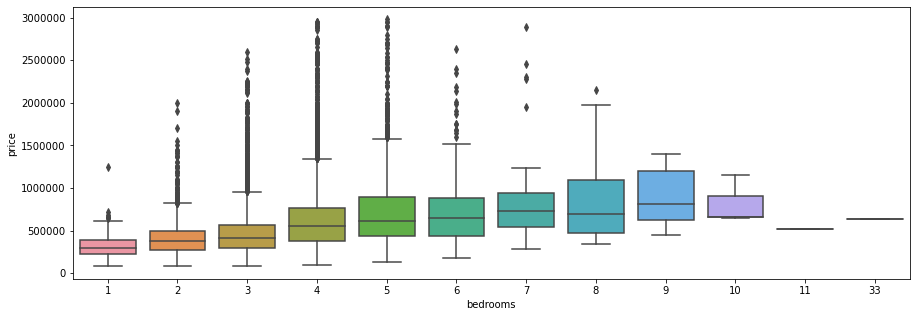

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x='bedrooms',y='price',data=df[df['price'] < 3000000])  # Remove some of the expensive homes
plt.ticklabel_format(style='plain', axis='y')

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

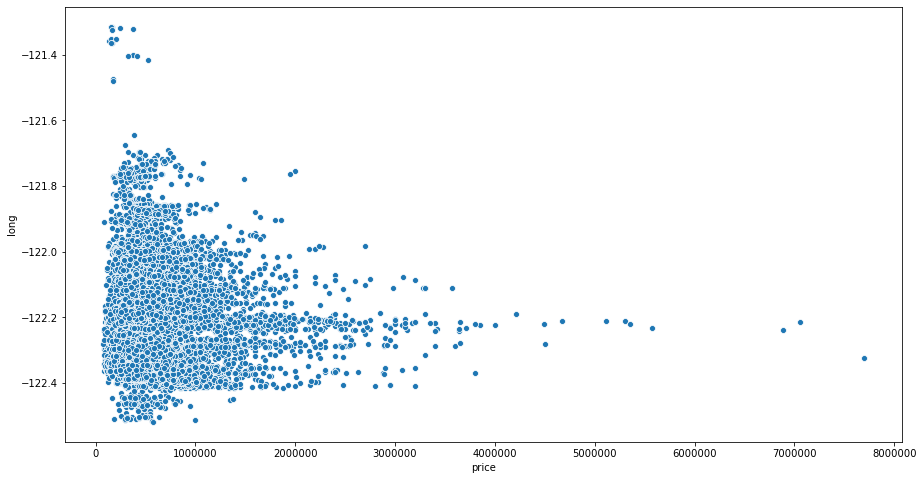

In [12]:
# Price vs Longitude
plt.figure(figsize=(15,8))
sns.scatterplot(x='price',y='long', data=df)
plt.ticklabel_format(style='plain', axis='x')

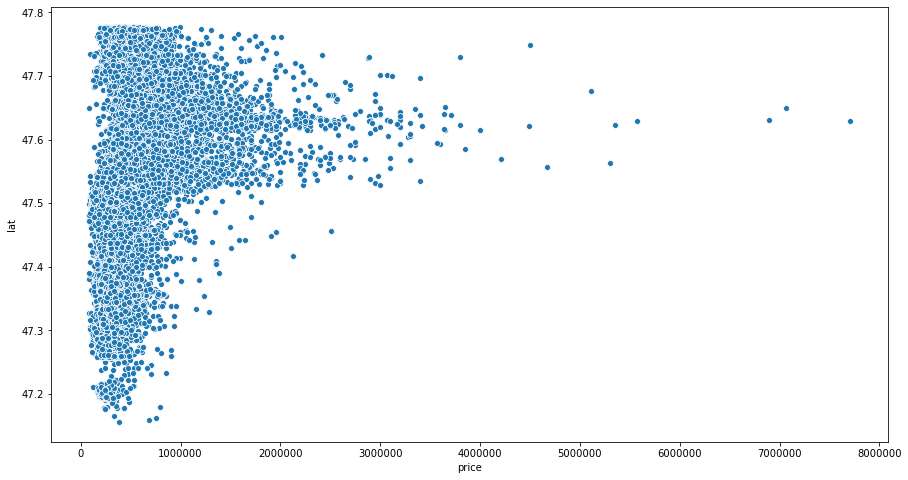

In [13]:
# Price vs Latitude
plt.figure(figsize=(15,8))
sns.scatterplot(x='price',y='lat', data=df)
plt.ticklabel_format(style='plain', axis='x')

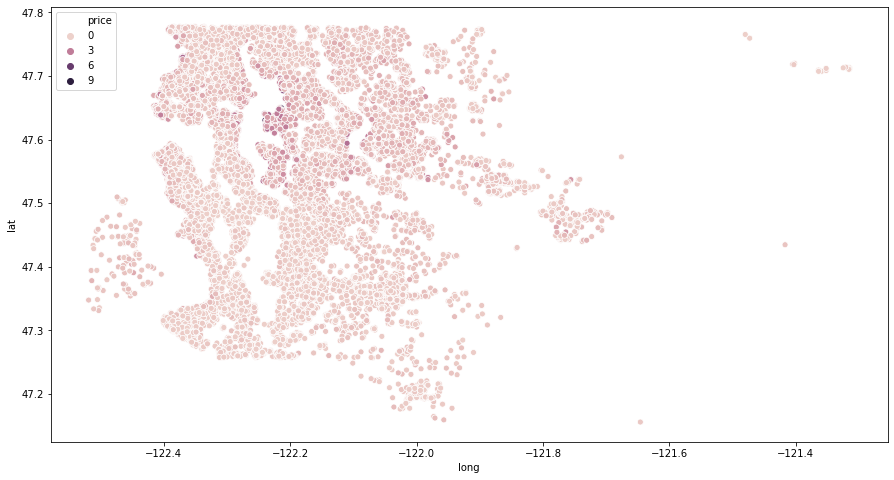

In [14]:
# Pseudo geogrpahic map of King County in Seattle
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='long', y='lat', hue = 'price')
plt.show()

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [17]:
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

In [18]:
non_top_1_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

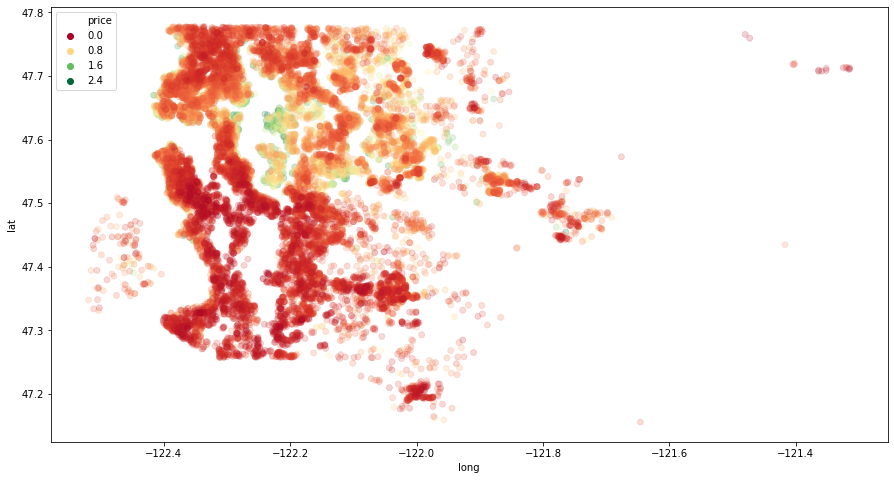

In [19]:
# Pseudo geogrpahic map of Seattle
plt.figure(figsize=(15,8))
sns.scatterplot(data=non_top_1_percent, x='long', y='lat', hue = 'price',
               edgecolor=None, alpha = 0.2, palette='RdYlGn')


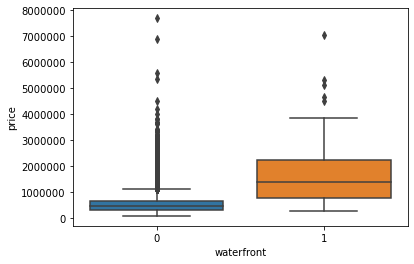

In [20]:
# Check on waterfront property vs price - don't exclude top 1 %
sns.boxplot(data=df,x='waterfront', y ='price')
plt.ticklabel_format(style='plain', axis='y')

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df = df.drop('id', axis=1)

In [23]:
df['date'] = pd.to_datetime(df['date']) # Convert to datetime object

In [24]:
df['date'] #Worked

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
df['year'] = df['date'].apply(lambda x: x.year)  # Example of Feature Engineering - Extract more info from original features

In [26]:
df['month'] = df['date'].apply(lambda x: x.month)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

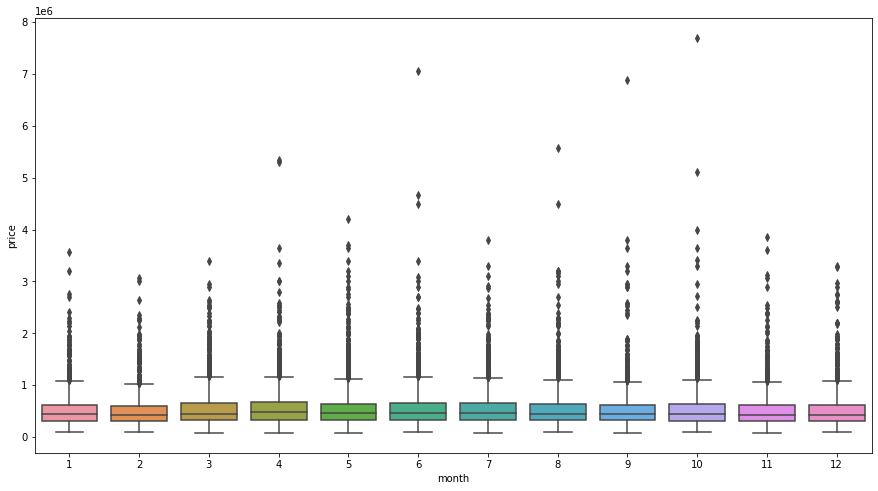

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='month', y='price')

<AxesSubplot:xlabel='month'>

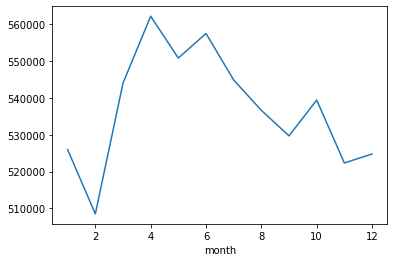

In [29]:
df.groupby('month').mean()['price'].plot() # Mean Sale price based on month

<AxesSubplot:xlabel='year'>

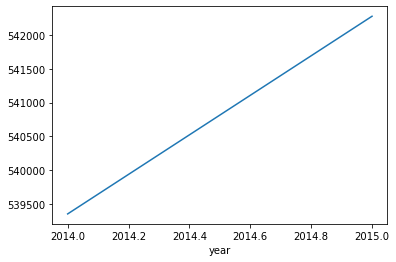

In [30]:
df.groupby('year').mean()['price'].plot() # Mean Sale price based on year

In [31]:
df = df.drop('date', axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [33]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [34]:
# 70 categories is too much for us so drop
df = df.drop('zipcode', axis=1)

In [35]:
df['yr_renovated'].value_counts() # Ok to leave this since recent renovations will likely sell for higher price

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
df['sqft_basement'].value_counts() # Can keep because its continuous, higher values likely mean higher price

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Data Pre-processing and Creating a Model

In [37]:
X = df.drop('price', axis=1).values      # values returns the numpy arrays - very important tensor flow cant work with pd dataframes very well

In [38]:
y = df['price'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### DO scaling post fit to prevent data leakage from the test set

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [48]:
from tensorflow.keras.models import Sequential

In [49]:
from tensorflow.keras.layers import Dense

In [50]:
X_train.shape  # 19 features so use 19 layers

(15117, 19)

In [51]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))  # Output predicted price

model.compile(optimizer='adam', loss='mse')

In [52]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430224441344.0000 - val_loss: 418810232832.0000
Epoch 2/400
119/119 [==============================] - 0s 712us/step - loss: 427608113152.0000 - val_loss: 409865289728.0000
Epoch 3/400
119/119 [==============================] - 0s 696us/step - loss: 393983229952.0000 - val_loss: 336493150208.0000
Epoch 4/400
119/119 [==============================] - 0s 721us/step - loss: 259626745856.0000 - val_loss: 157430530048.0000
Epoch 5/400
119/119 [==============================] - 0s 670us/step - loss: 117470265344.0000 - val_loss: 95600779264.0000
Epoch 6/400
119/119 [==============================] - 0s 679us/step - loss: 97849360384.0000 - val_loss: 93701128192.0000
Epoch 7/400
119/119 [==============================] - 0s 679us/step - loss: 95831703552.0000 - val_loss: 91738890240.0000
Epoch 8/400
119/119 [==============================] - 0s 738us/step - loss: 93830823936.0000 - val_loss: 89864781824.0000
Epoch 9/4

119/119 [==============================] - 0s 771us/step - loss: 36247887872.0000 - val_loss: 34897973248.0000
Epoch 68/400
119/119 [==============================] - 0s 679us/step - loss: 36098945024.0000 - val_loss: 34743267328.0000
Epoch 69/400
119/119 [==============================] - 0s 670us/step - loss: 35969466368.0000 - val_loss: 34644066304.0000
Epoch 70/400
119/119 [==============================] - 0s 738us/step - loss: 35816095744.0000 - val_loss: 34489171968.0000
Epoch 71/400
119/119 [==============================] - 0s 838us/step - loss: 35675144192.0000 - val_loss: 34382082048.0000
Epoch 72/400
119/119 [==============================] - 0s 830us/step - loss: 35519086592.0000 - val_loss: 34334662656.0000
Epoch 73/400
119/119 [==============================] - 0s 805us/step - loss: 35481448448.0000 - val_loss: 34226018304.0000
Epoch 74/400
119/119 [==============================] - 0s 796us/step - loss: 35330007040.0000 - val_loss: 34036502528.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 654us/step - loss: 32396906496.0000 - val_loss: 30737565696.0000
Epoch 134/400
119/119 [==============================] - 0s 679us/step - loss: 32410146816.0000 - val_loss: 30672668672.0000
Epoch 135/400
119/119 [==============================] - 0s 654us/step - loss: 32321292288.0000 - val_loss: 30665553920.0000
Epoch 136/400
119/119 [==============================] - 0s 670us/step - loss: 32314902528.0000 - val_loss: 30661586944.0000
Epoch 137/400
119/119 [==============================] - 0s 645us/step - loss: 32277604352.0000 - val_loss: 30569992192.0000
Epoch 138/400
119/119 [==============================] - 0s 645us/step - loss: 32267102208.0000 - val_loss: 30664978432.0000
Epoch 139/400
119/119 [==============================] - 0s 670us/step - loss: 32186734592.0000 - val_loss: 30486683648.0000
Epoch 140/400
119/119 [==============================] - 0s 637us/step - loss: 32196972544.0000 - val_loss: 30593511424.0000


119/119 [==============================] - 0s 704us/step - loss: 31084464128.0000 - val_loss: 29152100352.0000
Epoch 199/400
119/119 [==============================] - 0s 662us/step - loss: 31103768576.0000 - val_loss: 29308141568.0000
Epoch 200/400
119/119 [==============================] - 0s 662us/step - loss: 31080982528.0000 - val_loss: 29132517376.0000
Epoch 201/400
119/119 [==============================] - 0s 645us/step - loss: 31007287296.0000 - val_loss: 29163345920.0000
Epoch 202/400
119/119 [==============================] - 0s 670us/step - loss: 31067867136.0000 - val_loss: 29201410048.0000
Epoch 203/400
119/119 [==============================] - 0s 654us/step - loss: 31006418944.0000 - val_loss: 29074159616.0000
Epoch 204/400
119/119 [==============================] - 0s 704us/step - loss: 31075180544.0000 - val_loss: 29057306624.0000
Epoch 205/400
119/119 [==============================] - 0s 637us/step - loss: 30966691840.0000 - val_loss: 29051967488.0000
Epoch 206/400


119/119 [==============================] - 0s 637us/step - loss: 30227922944.0000 - val_loss: 28245073920.0000
Epoch 264/400
119/119 [==============================] - 0s 637us/step - loss: 30205007872.0000 - val_loss: 28098877440.0000
Epoch 265/400
119/119 [==============================] - 0s 603us/step - loss: 30221821952.0000 - val_loss: 28083136512.0000
Epoch 266/400
119/119 [==============================] - 0s 654us/step - loss: 30209998848.0000 - val_loss: 28085286912.0000
Epoch 267/400
119/119 [==============================] - 0s 612us/step - loss: 30220699648.0000 - val_loss: 28088793088.0000
Epoch 268/400
119/119 [==============================] - 0s 637us/step - loss: 30153644032.0000 - val_loss: 28008321024.0000
Epoch 269/400
119/119 [==============================] - 0s 637us/step - loss: 30147866624.0000 - val_loss: 28019531776.0000
Epoch 270/400
119/119 [==============================] - 0s 637us/step - loss: 30116544512.0000 - val_loss: 27996526592.0000
Epoch 271/400


119/119 [==============================] - 0s 629us/step - loss: 29401010176.0000 - val_loss: 27040010240.0000
Epoch 329/400
119/119 [==============================] - 0s 620us/step - loss: 29429692416.0000 - val_loss: 27041572864.0000
Epoch 330/400
119/119 [==============================] - 0s 637us/step - loss: 29391755264.0000 - val_loss: 27065511936.0000
Epoch 331/400
119/119 [==============================] - 0s 637us/step - loss: 29377474560.0000 - val_loss: 27002374144.0000
Epoch 332/400
119/119 [==============================] - 0s 645us/step - loss: 29396277248.0000 - val_loss: 26982164480.0000
Epoch 333/400
119/119 [==============================] - 0s 612us/step - loss: 29342666752.0000 - val_loss: 26964553728.0000
Epoch 334/400
119/119 [==============================] - 0s 637us/step - loss: 29373347840.0000 - val_loss: 26945671168.0000
Epoch 335/400
119/119 [==============================] - 0s 612us/step - loss: 29401239552.0000 - val_loss: 26951698432.0000
Epoch 336/400


119/119 [==============================] - 0s 612us/step - loss: 28810106880.0000 - val_loss: 26234589184.0000
Epoch 394/400
119/119 [==============================] - 0s 629us/step - loss: 28675104768.0000 - val_loss: 26225512448.0000
Epoch 395/400
119/119 [==============================] - 0s 629us/step - loss: 28647503872.0000 - val_loss: 26274848768.0000
Epoch 396/400
119/119 [==============================] - 0s 637us/step - loss: 28662628352.0000 - val_loss: 26188969984.0000
Epoch 397/400
119/119 [==============================] - 0s 645us/step - loss: 28645277696.0000 - val_loss: 26230177792.0000
Epoch 398/400
119/119 [==============================] - 0s 637us/step - loss: 28662743040.0000 - val_loss: 26193231872.0000
Epoch 399/400
119/119 [==============================] - 0s 637us/step - loss: 28667271168.0000 - val_loss: 26134900736.0000
Epoch 400/400
119/119 [==============================] - 0s 612us/step - loss: 28609095680.0000 - val_loss: 26136895488.0000


### Model Evaluation and Predictions

In [55]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

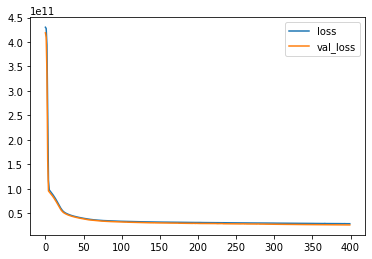

In [56]:
losses.plot()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [58]:
predictions = model.predict(X_test)

In [60]:
mean_squared_error(y_test, predictions)  # Too hard to interperet because its so large

26136896380.591164

In [61]:
np.sqrt(mean_squared_error(y_test, predictions) )

161669.09531691938

In [62]:
mean_absolute_error(y_test, predictions)  # Off by about a hundred thousand dollars.

99843.82191237461

In [63]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [66]:
5.402966e+05   # We're off by about 20% 100k on 540k mean home price

540296.6

In [68]:
explained_variance_score(y_test, predictions)  # merely just ok, depends on context.  Do we have a previous model that performs better than this

0.802925550000393

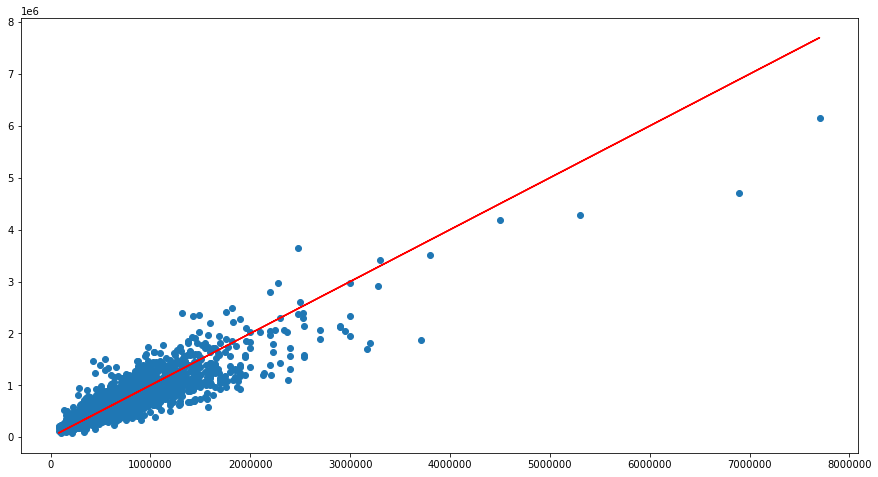

In [76]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r')
plt.ticklabel_format(style='plain', axis='x')
# Model works kind of well for homes less than $3MM

In [81]:
# Now predict price on a new home - use this one as an example
single_house = df.drop('price', axis=1).iloc[0]

In [84]:
single_house.values.reshape(-1, 19) # reshape to keep old dimensions along axis

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [87]:
model.predict(single_house)

array([[279553.88]], dtype=float32)

In [88]:
df.head()  # 279553 vs 221900

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Retrain model with top 2% of homes by price

In [94]:
len(df)*0.02

431.94

In [96]:
non_top_2_percent = df.sort_values('price', ascending=False).iloc[441:]

In [97]:
X = non_top_2_percent.drop('price', axis=1).values

In [99]:
y = non_top_2_percent['price'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

In [104]:
model2 = Sequential()

model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))

model2.add(Dense(1))  # Output predicted price

model2.compile(optimizer='adam', loss='mse')

In [111]:
model2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=800)

Epoch 1/800
116/116 [==============================] - 0s 671us/step - loss: 16920787968.0000 - val_loss: 16849608704.0000
Epoch 2/800
116/116 [==============================] - 0s 653us/step - loss: 16933660672.0000 - val_loss: 16841227264.0000
Epoch 3/800
116/116 [==============================] - 0s 671us/step - loss: 16920494080.0000 - val_loss: 16841865216.0000
Epoch 4/800
116/116 [==============================] - 0s 662us/step - loss: 16921700352.0000 - val_loss: 16841739264.0000
Epoch 5/800
116/116 [==============================] - 0s 653us/step - loss: 16912683008.0000 - val_loss: 16839990272.0000
Epoch 6/800
116/116 [==============================] - 0s 653us/step - loss: 16909414400.0000 - val_loss: 16834116608.0000
Epoch 7/800
116/116 [==============================] - 0s 645us/step - loss: 16910603264.0000 - val_loss: 16835272704.0000
Epoch 8/800
116/116 [==============================] - 0s 653us/step - loss: 16899020800.0000 - val_loss: 16856090624.0000
Epoch 9/800
116/

116/116 [==============================] - 0s 653us/step - loss: 16726221824.0000 - val_loss: 16678449152.0000
Epoch 68/800
116/116 [==============================] - 0s 696us/step - loss: 16734611456.0000 - val_loss: 16682899456.0000
Epoch 69/800
116/116 [==============================] - 0s 679us/step - loss: 16716869632.0000 - val_loss: 16689129472.0000
Epoch 70/800
116/116 [==============================] - 0s 662us/step - loss: 16731377664.0000 - val_loss: 16707016704.0000
Epoch 71/800
116/116 [==============================] - 0s 628us/step - loss: 16730318848.0000 - val_loss: 16656406528.0000
Epoch 72/800
116/116 [==============================] - 0s 628us/step - loss: 16731866112.0000 - val_loss: 16656133120.0000
Epoch 73/800
116/116 [==============================] - 0s 662us/step - loss: 16712023040.0000 - val_loss: 16650217472.0000
Epoch 74/800
116/116 [==============================] - 0s 662us/step - loss: 16710222848.0000 - val_loss: 16647098368.0000
Epoch 75/800
116/116 

Epoch 133/800
116/116 [==============================] - 0s 645us/step - loss: 16523053056.0000 - val_loss: 16454892544.0000
Epoch 134/800
116/116 [==============================] - 0s 619us/step - loss: 16524612608.0000 - val_loss: 16426363904.0000
Epoch 135/800
116/116 [==============================] - 0s 619us/step - loss: 16513814528.0000 - val_loss: 16433665024.0000
Epoch 136/800
116/116 [==============================] - 0s 653us/step - loss: 16510495744.0000 - val_loss: 16433157120.0000
Epoch 137/800
116/116 [==============================] - 0s 619us/step - loss: 16502973440.0000 - val_loss: 16441984000.0000
Epoch 138/800
116/116 [==============================] - 0s 662us/step - loss: 16514962432.0000 - val_loss: 16428421120.0000
Epoch 139/800
116/116 [==============================] - 0s 860us/step - loss: 16509291520.0000 - val_loss: 16447491072.0000
Epoch 140/800
116/116 [==============================] - 0s 903us/step - loss: 16502171648.0000 - val_loss: 16412114944.0000


116/116 [==============================] - 0s 662us/step - loss: 16317799424.0000 - val_loss: 16241355776.0000
Epoch 199/800
116/116 [==============================] - 0s 662us/step - loss: 16324455424.0000 - val_loss: 16169003008.0000
Epoch 200/800
116/116 [==============================] - 0s 645us/step - loss: 16313018368.0000 - val_loss: 16166630400.0000
Epoch 201/800
116/116 [==============================] - 0s 688us/step - loss: 16321240064.0000 - val_loss: 16245381120.0000
Epoch 202/800
116/116 [==============================] - 0s 653us/step - loss: 16314539008.0000 - val_loss: 16149472256.0000
Epoch 203/800
116/116 [==============================] - 0s 636us/step - loss: 16302305280.0000 - val_loss: 16163952640.0000
Epoch 204/800
116/116 [==============================] - 0s 679us/step - loss: 16311171072.0000 - val_loss: 16164723712.0000
Epoch 205/800
116/116 [==============================] - 0s 619us/step - loss: 16296289280.0000 - val_loss: 16156280832.0000
Epoch 206/800


116/116 [==============================] - 0s 653us/step - loss: 16185697280.0000 - val_loss: 16023425024.0000
Epoch 264/800
116/116 [==============================] - 0s 628us/step - loss: 16178952192.0000 - val_loss: 16019275776.0000
Epoch 265/800
116/116 [==============================] - 0s 636us/step - loss: 16202212352.0000 - val_loss: 16009631744.0000
Epoch 266/800
116/116 [==============================] - 0s 628us/step - loss: 16160513024.0000 - val_loss: 16047046656.0000
Epoch 267/800
116/116 [==============================] - 0s 662us/step - loss: 16176688128.0000 - val_loss: 16017408000.0000
Epoch 268/800
116/116 [==============================] - 0s 645us/step - loss: 16189127680.0000 - val_loss: 16015583232.0000
Epoch 269/800
116/116 [==============================] - 0s 645us/step - loss: 16162499584.0000 - val_loss: 15995912192.0000
Epoch 270/800
116/116 [==============================] - 0s 653us/step - loss: 16162230272.0000 - val_loss: 16017586176.0000
Epoch 271/800


116/116 [==============================] - 0s 619us/step - loss: 16006021120.0000 - val_loss: 15838286848.0000
Epoch 329/800
116/116 [==============================] - 0s 653us/step - loss: 15994314752.0000 - val_loss: 15837308928.0000
Epoch 330/800
116/116 [==============================] - 0s 615us/step - loss: 15997777920.0000 - val_loss: 15826828288.0000
Epoch 331/800
116/116 [==============================] - 0s 636us/step - loss: 15991251968.0000 - val_loss: 15832820736.0000
Epoch 332/800
116/116 [==============================] - 0s 645us/step - loss: 16009076736.0000 - val_loss: 15852321792.0000
Epoch 333/800
116/116 [==============================] - 0s 679us/step - loss: 15988272128.0000 - val_loss: 15932978176.0000
Epoch 334/800
116/116 [==============================] - 0s 653us/step - loss: 15968819200.0000 - val_loss: 15841171456.0000
Epoch 335/800
116/116 [==============================] - 0s 662us/step - loss: 15991809024.0000 - val_loss: 15806797824.0000
Epoch 336/800


116/116 [==============================] - 0s 628us/step - loss: 15569239040.0000 - val_loss: 15414187008.0000
Epoch 394/800
116/116 [==============================] - 0s 645us/step - loss: 15553757184.0000 - val_loss: 15402907648.0000
Epoch 395/800
116/116 [==============================] - 0s 645us/step - loss: 15544605696.0000 - val_loss: 15387539456.0000
Epoch 396/800
116/116 [==============================] - 0s 636us/step - loss: 15534390272.0000 - val_loss: 15387821056.0000
Epoch 397/800
116/116 [==============================] - 0s 679us/step - loss: 15527593984.0000 - val_loss: 15356067840.0000
Epoch 398/800
116/116 [==============================] - 0s 636us/step - loss: 15506022400.0000 - val_loss: 15386739712.0000
Epoch 399/800
116/116 [==============================] - 0s 696us/step - loss: 15494595584.0000 - val_loss: 15372894208.0000
Epoch 400/800
116/116 [==============================] - 0s 731us/step - loss: 15497644032.0000 - val_loss: 15321532416.0000
Epoch 401/800


116/116 [==============================] - 0s 662us/step - loss: 14186963968.0000 - val_loss: 14002040832.0000
Epoch 459/800
116/116 [==============================] - 0s 628us/step - loss: 14147997696.0000 - val_loss: 13984570368.0000
Epoch 460/800
116/116 [==============================] - 0s 671us/step - loss: 14138668032.0000 - val_loss: 13959892992.0000
Epoch 461/800
116/116 [==============================] - 0s 653us/step - loss: 14101590016.0000 - val_loss: 13914531840.0000
Epoch 462/800
116/116 [==============================] - 0s 645us/step - loss: 14055816192.0000 - val_loss: 13930962944.0000
Epoch 463/800
116/116 [==============================] - 0s 653us/step - loss: 14039664640.0000 - val_loss: 13857126400.0000
Epoch 464/800
116/116 [==============================] - 0s 645us/step - loss: 14007817216.0000 - val_loss: 13804569600.0000
Epoch 465/800
116/116 [==============================] - 0s 696us/step - loss: 13975198720.0000 - val_loss: 13766618112.0000
Epoch 466/800


116/116 [==============================] - 0s 653us/step - loss: 12015194112.0000 - val_loss: 11734178816.0000
Epoch 524/800
116/116 [==============================] - 0s 662us/step - loss: 12020994048.0000 - val_loss: 11742082048.0000
Epoch 525/800
116/116 [==============================] - 0s 662us/step - loss: 11964984320.0000 - val_loss: 11689438208.0000
Epoch 526/800
116/116 [==============================] - 0s 662us/step - loss: 11945997312.0000 - val_loss: 11699331072.0000
Epoch 527/800
116/116 [==============================] - 0s 679us/step - loss: 11938259968.0000 - val_loss: 11743360000.0000
Epoch 528/800
116/116 [==============================] - 0s 662us/step - loss: 11892682752.0000 - val_loss: 11646843904.0000
Epoch 529/800
116/116 [==============================] - 0s 645us/step - loss: 11887225856.0000 - val_loss: 11634884608.0000
Epoch 530/800
116/116 [==============================] - 0s 628us/step - loss: 11854929920.0000 - val_loss: 11614697472.0000
Epoch 531/800


116/116 [==============================] - 0s 645us/step - loss: 11106274304.0000 - val_loss: 10981147648.0000
Epoch 589/800
116/116 [==============================] - 0s 645us/step - loss: 11071990784.0000 - val_loss: 10953322496.0000
Epoch 590/800
116/116 [==============================] - 0s 619us/step - loss: 11077460992.0000 - val_loss: 10967879680.0000
Epoch 591/800
116/116 [==============================] - 0s 653us/step - loss: 11068635136.0000 - val_loss: 10986832896.0000
Epoch 592/800
116/116 [==============================] - 0s 628us/step - loss: 11067287552.0000 - val_loss: 10927830016.0000
Epoch 593/800
116/116 [==============================] - 0s 653us/step - loss: 11048545280.0000 - val_loss: 11038513152.0000
Epoch 594/800
116/116 [==============================] - 0s 645us/step - loss: 11063554048.0000 - val_loss: 10947415040.0000
Epoch 595/800
116/116 [==============================] - 0s 619us/step - loss: 11049659392.0000 - val_loss: 10926660608.0000
Epoch 596/800


116/116 [==============================] - 0s 653us/step - loss: 10730404864.0000 - val_loss: 10692176896.0000
Epoch 654/800
116/116 [==============================] - 0s 653us/step - loss: 10744663040.0000 - val_loss: 10704573440.0000
Epoch 655/800
116/116 [==============================] - 0s 645us/step - loss: 10752031744.0000 - val_loss: 10783926272.0000
Epoch 656/800
116/116 [==============================] - 0s 653us/step - loss: 10743051264.0000 - val_loss: 10693969920.0000
Epoch 657/800
116/116 [==============================] - 0s 662us/step - loss: 10718620672.0000 - val_loss: 10677090304.0000
Epoch 658/800
116/116 [==============================] - 0s 662us/step - loss: 10713900032.0000 - val_loss: 10666989568.0000
Epoch 659/800
116/116 [==============================] - 0s 619us/step - loss: 10751141888.0000 - val_loss: 10669204480.0000
Epoch 660/800
116/116 [==============================] - 0s 653us/step - loss: 10705064960.0000 - val_loss: 10672804864.0000
Epoch 661/800


116/116 [==============================] - 0s 688us/step - loss: 10512349184.0000 - val_loss: 10544528384.0000
Epoch 719/800
116/116 [==============================] - 0s 679us/step - loss: 10516922368.0000 - val_loss: 10529185792.0000
Epoch 720/800
116/116 [==============================] - 0s 653us/step - loss: 10506963968.0000 - val_loss: 10531660800.0000
Epoch 721/800
116/116 [==============================] - 0s 679us/step - loss: 10505103360.0000 - val_loss: 10526452736.0000
Epoch 722/800
116/116 [==============================] - 0s 671us/step - loss: 10509793280.0000 - val_loss: 10574884864.0000
Epoch 723/800
116/116 [==============================] - 0s 636us/step - loss: 10503715840.0000 - val_loss: 10518122496.0000
Epoch 724/800
116/116 [==============================] - 0s 653us/step - loss: 10529116160.0000 - val_loss: 10538444800.0000
Epoch 725/800
116/116 [==============================] - 0s 636us/step - loss: 10504230912.0000 - val_loss: 10529500160.0000
Epoch 726/800


116/116 [==============================] - 0s 628us/step - loss: 10348155904.0000 - val_loss: 10362222592.0000
Epoch 784/800
116/116 [==============================] - 0s 653us/step - loss: 10347302912.0000 - val_loss: 10391198720.0000
Epoch 785/800
116/116 [==============================] - 0s 619us/step - loss: 10371186688.0000 - val_loss: 10366251008.0000
Epoch 786/800
116/116 [==============================] - 0s 653us/step - loss: 10365545472.0000 - val_loss: 10356246528.0000
Epoch 787/800
116/116 [==============================] - 0s 653us/step - loss: 10328343552.0000 - val_loss: 10356771840.0000
Epoch 788/800
116/116 [==============================] - 0s 619us/step - loss: 10342395904.0000 - val_loss: 10391810048.0000
Epoch 789/800
116/116 [==============================] - 0s 645us/step - loss: 10343385088.0000 - val_loss: 10383339520.0000
Epoch 790/800
116/116 [==============================] - 0s 619us/step - loss: 10346921984.0000 - val_loss: 10364333056.0000
Epoch 791/800


In [112]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

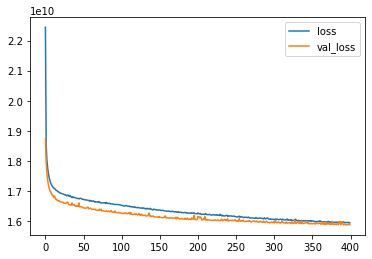

In [113]:
losses.plot()

In [114]:
predictions = model.predict(X_test)

In [115]:
mean_absolute_error(y_test, predictions)  

88159.54376944817

In [118]:
explained_variance_score(y_test, predictions) # ACTUALLY GOT WORSE

0.7635833272297101

In [117]:
non_top_2_percent['price'].describe()

count    2.115600e+04
mean     5.051799e+05
std      2.557401e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.460000e+05
75%      6.250000e+05
max      1.600000e+06
Name: price, dtype: float64

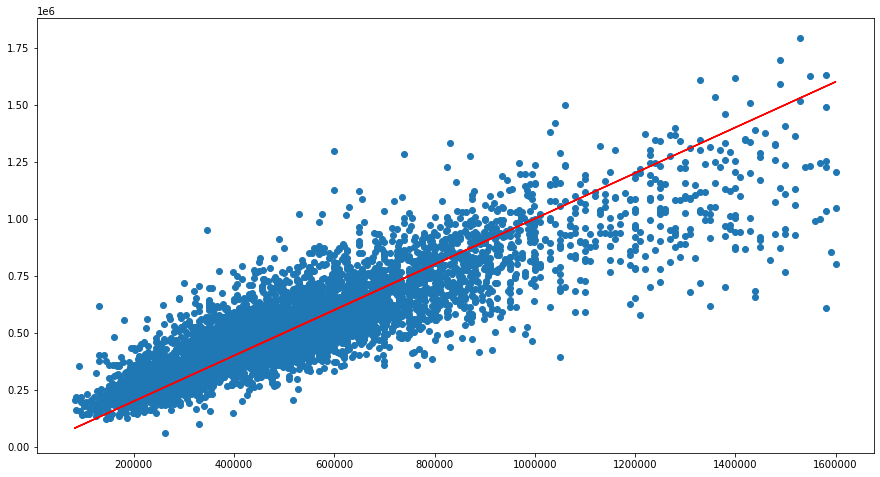

In [121]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r')
plt.ticklabel_format(style='plain', axis='x')

In [126]:
single_house = non_top_2_percent.drop('price', axis=1).iloc[0]

In [127]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [128]:
model2.predict(single_house)

array([[1165534.4]], dtype=float32)

In [132]:
non_top_2_percent.iloc[0]

price            1.600000e+06
bedrooms         5.000000e+00
bathrooms        3.250000e+00
sqft_living      4.320000e+03
sqft_lot         3.284000e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.200000e+01
sqft_above       4.320000e+03
sqft_basement    0.000000e+00
yr_built         1.990000e+03
yr_renovated     0.000000e+00
lat              4.754610e+01
long            -1.221220e+02
sqft_living15    4.410000e+03
sqft_lot15       3.321000e+04
year             2.015000e+03
month            4.000000e+00
Name: 11825, dtype: float64